In [2]:
import pulp
import matplotlib.pyplot as plot
import networkx as nx
import math

def dist(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def get_graph(coordinates):
    g = nx.Graph()
    n = len(coordinates)
    for i in range(n):
        for j in range(i + 1):
            g.add_edge(i, j, weight=dist(coordinates[i][0], coordinates[i][1], coordinates[j][0], coordinates[j][1]))
    nx.draw(g, with_labels=1)
    plot.show()
    return g

def plot_cycle(coordinates, cycle):
    x_coordinates = [coordinates[i][0] for i in cycle]
    y_coordinates = [coordinates[i][1] for i in cycle]

    # Add the first vertex of the cycle (to close the cycle)
    x_coordinates.append(coordinates[cycle[0]][0])
    y_coordinates.append(coordinates[cycle[0]][1])

    plot.plot(x_coordinates, y_coordinates, 'xb-', )
    plot.show()

In [3]:
# No need to do NN algorithm for now

In [4]:
def ilp(g):
    n = g.number_of_nodes()
    m = pulp.LpProblem('TSP', pulp.LpMinimize)
    x= []
    # be careful converting list comprehension to for loops
    for i in range(n):
        y = []
        for j in range(n):
            y.append(pulp.LpVariable("x_{}_{}".format(j,i), cat='Binary')) # These are edges. Deliberate (j, i) Category of 'binary' means 'ON' & 'OFF', will be taken only if its == 1
        x.append(y)

    for i in range(n): # Never take self-loops (an edge from i to i).
        m += pulp.lpSum(x[i][i]) == 0
    
    for i in range(n): # Make sure the self-loops areof weight 0
      g.add_edge(i, i, weight =0)
    
    # The objective function (to be minimized) is the sum of the weights of taken edges
    m += pulp.lpSum([g[i][j]['weight'] * x[i][j] for i in range(n) for j in range(n)])

    # Add the constraints saying that each vertex has exactly one outgoing edge.
    for i in range(n):
        m += pulp.lpSum([x[i][j] for j in range(n)]) == 1

    # Add the constraints saying that each vertex has exactly one incoming edge.
    for i in range(n):
        m += pulp.lpSum([x[j][i] for j in range(n)]) == 1

    # Introduce auxiliary variables u_i for 0 <= i <= n-1.
    u = []
    # u_0 = 0
    u.append(pulp.LpVariable('u_0', 1, 1, cat='Integer'))
    # For i > 0, we have that 2 <= u_i <= n.
    for i in range(1, n):
        u.append(pulp.LpVariable('u_' + str(i), 2, n, cat='Integer'))

    # In order to ensure that we find *one* cycle covering all vertices,
    # for every i, j > 0, we add the constraint u_i - u_j + n * x_i_j <= n-1
    for i in range(1, n):
        for j in range(1, n):
            m += pulp.lpSum([u[i] - u[j] + n * x[i][j]]) <= n - 1
    print(m)
    m.solve()
    # pulp.value(x[i][j]) has 0, 1 values, where 1 is the edge taken!

    weight = sum([g[i][j]['weight'] * pulp.value(x[i][j]) for i in range(n) for j in range(n)])
    print("the minimal cycle length is ", weight)
    
    # Extract cycle from the matrix x
    cycleMatrix = [[pulp.value(x[i][j]) for i in range(n)] for j in range(n)]
    i = 0
    i = cycleMatrix[0].index(1)
    cycle = [i]
    while (i != 0):
        i = cycleMatrix[i].index(1)
        cycle.append(i)
    return cycle

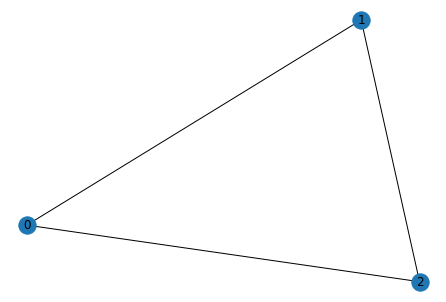

TSP:
MINIMIZE
3.0*x_0_1 + 4.0*x_0_2 + 3.0*x_1_0 + 5.0*x_1_2 + 4.0*x_2_0 + 5.0*x_2_1 + 0.0
SUBJECT TO
_C1: x_0_0 = 0

_C2: x_1_1 = 0

_C3: x_2_2 = 0

_C4: x_0_0 + x_1_0 + x_2_0 = 1

_C5: x_0_1 + x_1_1 + x_2_1 = 1

_C6: x_0_2 + x_1_2 + x_2_2 = 1

_C7: x_0_0 + x_0_1 + x_0_2 = 1

_C8: x_1_0 + x_1_1 + x_1_2 = 1

_C9: x_2_0 + x_2_1 + x_2_2 = 1

_C10: 0 u_1 + 3 x_1_1 <= 2

_C11: u_1 - u_2 + 3 x_2_1 <= 2

_C12: - u_1 + u_2 + 3 x_1_2 <= 2

_C13: 0 u_2 + 3 x_2_2 <= 2

VARIABLES
2 <= u_1 <= 3 Integer
2 <= u_2 <= 3 Integer
0 <= x_0_0 <= 1 Integer
0 <= x_0_1 <= 1 Integer
0 <= x_0_2 <= 1 Integer
0 <= x_1_0 <= 1 Integer
0 <= x_1_1 <= 1 Integer
0 <= x_1_2 <= 1 Integer
0 <= x_2_0 <= 1 Integer
0 <= x_2_1 <= 1 Integer
0 <= x_2_2 <= 1 Integer

the minimal cycle length is  12.0


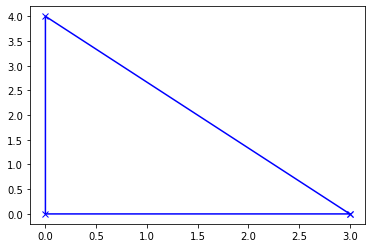

In [5]:
coordinates = [(0, 0), (3, 0), (0, 4)]
g = get_graph(coordinates)
cycle = ilp(g)
plot_cycle(coordinates, cycle)

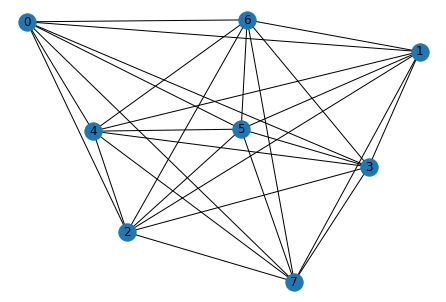

TSP:
MINIMIZE
56.568542494923804*x_0_1 + 123.7457069962429*x_0_2 + 125.39936203984452*x_0_3 + 204.45292856792244*x_0_4 + 156.01281998605114*x_0_5 + 143.83671297690307*x_0_6 + 30.4138126514911*x_0_7 + 56.568542494923804*x_1_0 + 180.31361568112376*x_1_2 + 98.6154146165801*x_1_3 + 147.92227688891217*x_1_4 + 123.36936410632909*x_1_5 + 200.32224040280698*x_1_6 + 55.54277630799526*x_1_7 + 123.7457069962429*x_2_0 + 180.31361568112376*x_2_1 + 225.89378034819816*x_2_3 + 328.1463088318989*x_2_4 + 258.3815008858026*x_2_5 + 22.135943621178654*x_2_6 + 135.91173606425605*x_2_7 + 125.39936203984452*x_3_0 + 98.6154146165801*x_3_1 + 225.89378034819816*x_3_2 + 151.90786681406595*x_3_4 + 209.0095691589263*x_3_5 + 248.02016047087784*x_3_6 + 98.08159868191383*x_3_7 + 204.45292856792244*x_4_0 + 147.92227688891217*x_4_1 + 328.1463088318989*x_4_2 + 151.90786681406595*x_4_3 + 151.8453160291749*x_4_5 + 348.24416721604973*x_4_6 + 196.468827043885*x_4_7 + 156.01281998605114*x_5_0 + 123.36936410632909*x_5_1 + 258.

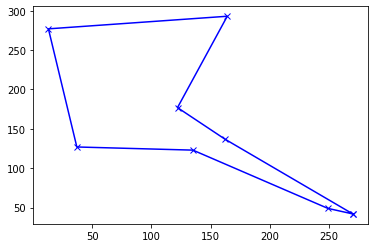

In [6]:
# Example 2
# Consider the following 8 points.
coordinates = [(162, 137), (122, 177), (249, 49), (37, 127), (13, 277), (164, 293), (270, 42), (135, 123)]
# Create a corresponding graph.
g = get_graph(coordinates)
# Compute an optimal Hamiltonian path using Integer Linear Programming:
cycle = ilp(g)
# Plot the resulting cycle
plot_cycle(coordinates, cycle)

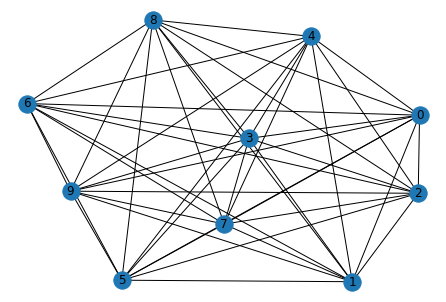

TSP:
MINIMIZE
164.68454693747074*x_0_1 + 182.4636950190366*x_0_2 + 120.50311199301038*x_0_3 + 63.7808748764079*x_0_4 + 174.92855684535903*x_0_5 + 109.55363982999378*x_0_6 + 86.64871608973787*x_0_7 + 184.13310403075272*x_0_8 + 58.008620049092706*x_0_9 + 164.68454693747074*x_1_0 + 43.104524124504614*x_1_2 + 197.71696942852427*x_1_3 + 138.2208377922808*x_1_4 + 25.238858928247925*x_1_5 + 72.42237223399962*x_1_6 + 223.57325421436258*x_1_7 + 40.0*x_1_8 + 221.63934668736056*x_1_9 + 182.4636950190366*x_2_0 + 43.104524124504614*x_2_1 + 234.3885662740399*x_2_3 + 169.11830178901394*x_2_4 + 64.93843238021688*x_2_5 + 75.0*x_2_6 + 251.7478897627545*x_2_7 + 77.88452991448301*x_2_8 + 236.07202290826416*x_2_9 + 120.50311199301038*x_3_0 + 197.71696942852427*x_3_1 + 234.3885662740399*x_3_2 + 73.97972695272672*x_3_4 + 191.65855055279948*x_3_5 + 184.39360075664231*x_3_6 + 72.00694410957877*x_3_7 + 191.80198122021577*x_3_8 + 147.75655653811103*x_3_9 + 63.7808748764079*x_4_0 + 138.2208377922808*x_4_1 + 169.1

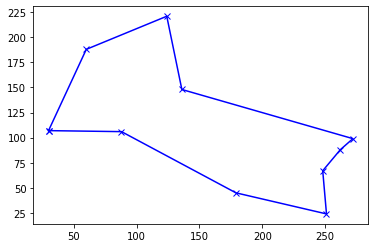

In [7]:
# Example 3
# Consider the following 10 points.
coordinates = [(88, 106), (248, 67), (251, 24), (124, 221), (136, 148), (262, 88), (179, 45), (60, 188), (272, 99), (30, 107)]
# Create a corresponding graph.
g = get_graph(coordinates)
# Compute an optimal Hamiltonian path using Integer Linear Programming:
cycle = ilp(g)
print(cycle)
# Plot the resulting cycle
plot_cycle(coordinates, cycle)

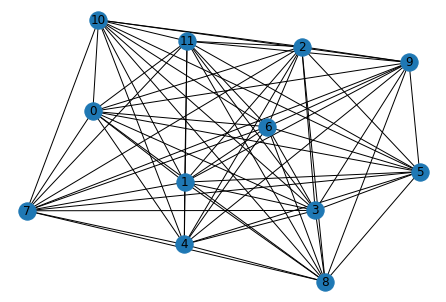

TSP:
MINIMIZE
331.6338342208165*x_0_1 + 199.06029237394384*x_0_10 + 29.154759474226502*x_0_11 + 368.5986977730659*x_0_2 + 68.06614430096654*x_0_3 + 332.2845166419886*x_0_4 + 134.3726162579266*x_0_5 + 274.5906043549196*x_0_6 + 174.26990560621763*x_0_7 + 69.83552104767315*x_0_8 + 214.23818520515897*x_0_9 + 199.06029237394384*x_10_0 + 198.08079159777205*x_10_1 + 206.4097865896867*x_10_11 + 235.9872877932199*x_10_2 + 131.0267148332736*x_10_3 + 262.42713274354844*x_10_4 + 67.97793759742936*x_10_5 + 271.89152248645047*x_10_6 + 64.38167441127949*x_10_7 + 134.13426109685773*x_10_8 + 53.03772242470448*x_10_9 + 29.154759474226502*x_11_0 + 321.50427679892533*x_11_1 + 206.4097865896867*x_11_10 + 357.39753776432207*x_11_2 + 79.42921376924235*x_11_3 + 313.6957124348371*x_11_4 + 145.9931505242626*x_11_5 + 250.53941805632104*x_11_6 + 172.75416058665562*x_11_7 + 72.3394774656273*x_11_8 + 214.41082062246764*x_11_9 + 331.6338342208165*x_1_0 + 198.08079159777205*x_1_10 + 321.50427679892533*x_1_11 + 38.910

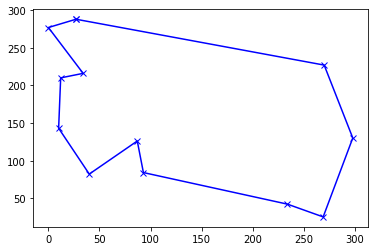

In [8]:
# Example 4
# Consider the following 12 points.
coordinates = [(0, 277), (234, 42), (269, 25), (12, 210), (298, 130), (10, 143), (270, 227), (87, 126), (34, 216), (93, 84), (40, 82), (27, 288)]
# Create a corresponding graph.
g = get_graph(coordinates)
# Compute an optimal Hamiltonian path using Integer Linear Programming:
cycle = ilp(g)
# Plot the resulting cycle
plot_cycle(coordinates, cycle)

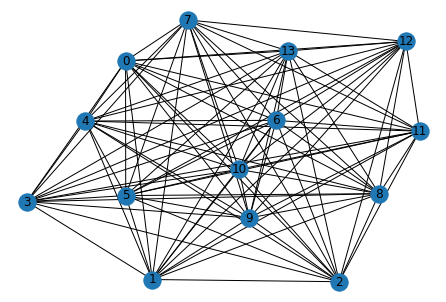

4224133723*x_0_3 + 166.20770138594662*x_0_4 + 158.15182578775372*x_0_5 + 99.36800289831733*x_0_6 + 191.3243319601561*x_0_7 + 174.42763542512407*x_0_8 + 81.85963596303125*x_0_9 + 193.238194982255*x_10_0 + 227.40272645683032*x_10_1 + 288.63991407980984*x_10_11 + 240.18534509832193*x_10_12 + 133.4541119636259*x_10_13 + 270.29613389761977*x_10_2 + 198.15650380444242*x_10_3 + 345.35778549208936*x_10_4 + 278.85659396901485*x_10_5 + 269.6683147868878*x_10_6 + 292.09929818470977*x_10_7 + 170.75128110793196*x_10_8 + 136.93794214898952*x_10_9 + 104.0096149401583*x_11_0 + 84.00595217006948*x_11_1 + 288.63991407980984*x_11_10 + 97.74456506629922*x_11_12 + 156.40012787718558*x_11_13 + 48.75448697299562*x_11_2 + 157.20368952413298*x_11_3 + 62.64982043070834*x_11_4 + 114.62111498323509*x_11_5 + 127.20062892926276*x_11_6 + 151.64761785138597*x_11_7 + 212.11553455605272*x_11_8 + 185.43192821086663*x_11_9 + 116.37869220780924*x_12_0 + 26.40075756488817*x_12_1 + 240.18534509832193*x_12_10 + 97.7445650662

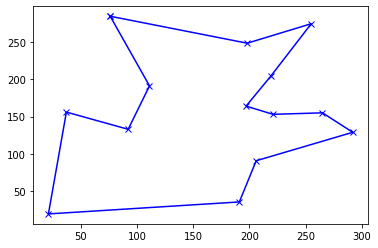

In [9]:
# Example 5
# Consider the following 14 points.
coordinates = [(111, 191), (197, 164), (219, 204), (206, 91), (255, 274), (265, 155), (76, 284), (292, 129), (191, 36), (37, 156), (21, 20), (198, 248), (221, 153), (92, 133)]
# Create a corresponding graph.
g = get_graph(coordinates)
# Compute an optimal Hamiltonian path using Integer Linear Programming:
cycle = ilp(g)
# Plot the resulting cycle
plot_cycle(coordinates, cycle)

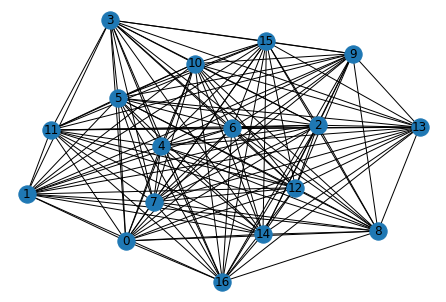

 x_2_16 + x_3_16 + x_4_16 + x_5_16 + x_6_16 + x_7_16
 + x_8_16 + x_9_16 = 1

_C35: x_0_0 + x_0_1 + x_0_10 + x_0_11 + x_0_12 + x_0_13 + x_0_14 + x_0_15
 + x_0_16 + x_0_2 + x_0_3 + x_0_4 + x_0_5 + x_0_6 + x_0_7 + x_0_8 + x_0_9 = 1

_C36: x_1_0 + x_1_1 + x_1_10 + x_1_11 + x_1_12 + x_1_13 + x_1_14 + x_1_15
 + x_1_16 + x_1_2 + x_1_3 + x_1_4 + x_1_5 + x_1_6 + x_1_7 + x_1_8 + x_1_9 = 1

_C37: x_2_0 + x_2_1 + x_2_10 + x_2_11 + x_2_12 + x_2_13 + x_2_14 + x_2_15
 + x_2_16 + x_2_2 + x_2_3 + x_2_4 + x_2_5 + x_2_6 + x_2_7 + x_2_8 + x_2_9 = 1

_C38: x_3_0 + x_3_1 + x_3_10 + x_3_11 + x_3_12 + x_3_13 + x_3_14 + x_3_15
 + x_3_16 + x_3_2 + x_3_3 + x_3_4 + x_3_5 + x_3_6 + x_3_7 + x_3_8 + x_3_9 = 1

_C39: x_4_0 + x_4_1 + x_4_10 + x_4_11 + x_4_12 + x_4_13 + x_4_14 + x_4_15
 + x_4_16 + x_4_2 + x_4_3 + x_4_4 + x_4_5 + x_4_6 + x_4_7 + x_4_8 + x_4_9 = 1

_C40: x_5_0 + x_5_1 + x_5_10 + x_5_11 + x_5_12 + x_5_13 + x_5_14 + x_5_15
 + x_5_16 + x_5_2 + x_5_3 + x_5_4 + x_5_5 + x_5_6 + x_5_7 + x_5_8 + x_5_9 = 1

_C41:

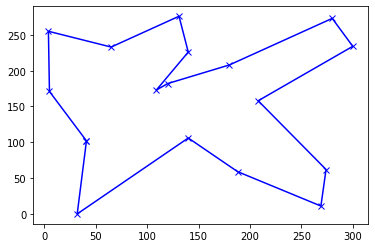

In [10]:
# Example 6
# Consider the following 17 points.
coordinates = [(5, 171), (109, 173), (4, 255), (208, 158), (269, 11), (280, 273), (32, 0), (188, 59), (180, 208), (140, 106), (131, 276), (65, 233), (274, 62), (120, 182), (300, 234), (41, 102), (140, 226)]
# Create a corresponding graph.
g = get_graph(coordinates)
# Compute an optimal Hamiltonian path using Integer Linear Programming:
cycle = ilp(g)
print(cycle)
# Plot the resulting cycle
plot_cycle(coordinates, cycle)